In [73]:
# Import all necessary libraries
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib
from pylab import *
import numpy as np
import random
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

Sejam as seguintes funções hipótese:

$y = a_0 + a_1 x$

$y = a_0' + a_1' x'$

Padronizando $x$ na equação acima como mostrado abaixo

$x' = \frac{x - \mu_x}{\sigma_x}$

nós temos

$y = a_0' + a_1' \frac{x - \mu_x}{\sigma_x}$

$y = a_0 + \frac{a_1}{\sigma_x}x - \frac{a_1 \mu_x}{\sigma_x}$

$y = \left( a_0- \frac{a_1 \mu_x}{\sigma_x} \right) + \frac{a_1}{\sigma_x}x $

Sabendo que as duas equações iniciais resultam nos mesmo valores, nós podemos escrever

$ a_0 + a_1 x = \left( a_0- \frac{a_1 \mu_x}{\sigma_x} \right) + \frac{a_1}{\sigma_x}x $

Que pode ser re-escrita como

$\left( a_0 - a_0' + \frac{a_1' \mu_x}{\sigma_x}  \right) + \left(a_1 - \frac{a_1'}{\sigma_x} \right)x = 0$

A unica forma da equação acima ser igual a zero é quando

$\left( a_0 - a_0' + \frac{a_1' \mu_x}{\sigma_x}  \right) = 0$

e

$\left(a_1 - \frac{a_1'}{\sigma_x} \right) = 0$

Resolvendo cada uma das equações acima para $a_0'$ e $a_1'$ temos

$a_1' = a_1 \sigma_x$

$a_0' = a_0 + a_1 \mu_x$

In [74]:
M = 1000

x = 10.0*np.random.rand(M,) - 5.0

a0 = 1.0

a1 = 2.0

y = a0 + a1*x

x = x.reshape(M,1)
y = y.reshape(M,1)

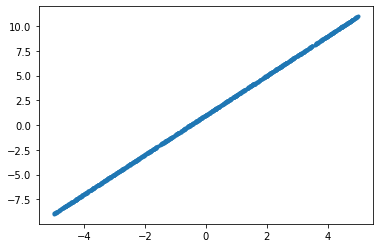

In [75]:
plt.plot(x,y,'.')
plt.show()

In [76]:
X = np.c_[np.ones((M,1)), x]

a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))

print('a0', a_opt[0][0])
print('a1', a_opt[1][0])

a0 1.0000000000000004
a1 2.0


In [77]:
scaler = StandardScaler()

xl = scaler.fit_transform(x)

Xl = np.c_[np.ones((M,1)), xl]

In [78]:
a_opt_std = np.linalg.pinv(np.transpose(Xl).dot(Xl)).dot(np.transpose(Xl).dot(y))

print('a0\': %1.6f' % a_opt_std[0][0])
print('a1\': %1.6f' % a_opt_std[1][0])

a0': 1.171564
a1': 5.763391


In [79]:
mean = scaler.mean_[0]
std = np.sqrt(scaler.var_[0])

print('mean: %f - std: %f' % (mean,std))

print('a0\': %1.6f' % (a0 + a1*mean))
print('a1\': %1.6f' % (a1*std))

mean: 0.085782 - std: 2.881696
a0': 1.171564
a1': 5.763391


In [80]:
ypred = a_opt_std[0][0] + a_opt_std[1][0]*xl

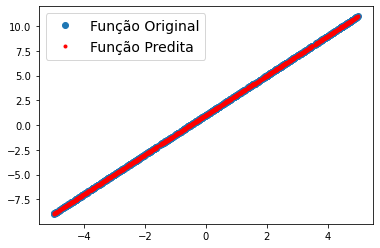

In [81]:
plt.plot(x, ypred,'o', label='Função Original')
plt.plot(x,y,'r.', label='Função Predita')
plt.legend(fontsize=14)
plt.show()

In [82]:
scaler = MinMaxScaler()

xl = scaler.fit_transform(x)

Xl = np.c_[np.ones((M,1)), xl]

In [83]:
a_opt_std = np.linalg.pinv(np.transpose(Xl).dot(Xl)).dot(np.transpose(Xl).dot(y))

print('a0\': %1.6f' % a_opt_std[0][0])
print('a1\': %1.6f' % a_opt_std[1][0])

a0': -8.979063
a1': 19.971786


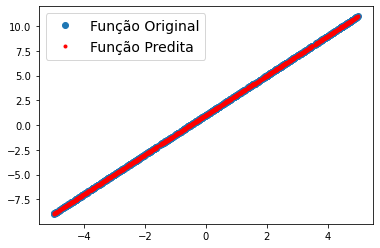

In [84]:
ypred = a_opt_std[0][0] + a_opt_std[1][0]*xl


plt.plot(x, ypred,'o', label='Função Original')
plt.plot(x,y,'r.', label='Função Predita')
plt.legend(fontsize=14)
plt.show()